In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Baseline
_____
For my target variable, hmlsmorethan1Yr, it is imbalanced with 0 class as 0.65 and 1 class as 0.34. Because of this, I am going to use the null model as the baseline which has 0.50 accuracy, which can be found in logreg_model.ipynb.  

# Data Concatenating Process
_____

Concatenating process with 2017-2019 Los Angeles youth homelessness survey datasets 

In [2]:
# reading all three datasets
y_2017 = pd.read_csv('datasets/youth_2017_secondattempt.csv', encoding='latin1')
y_2018 = pd.read_csv('datasets/youth_2018_secondattempt.csv', encoding='latin1')
y_2019 = pd.read_csv('datasets/youth_2019_secondattempt.csv', encoding='latin1')

In [3]:
# seeing what it looks like for 2017
y_2017.head(3)

,StartDate,EndDate,Duration,Response_ID,rawnumov24,rawnum1824,rawnumund18,rawLACity,rawLACity_specify,rawsurveystatus,...,relation,indiv_seq,SPA,SD,CD,ca_ssd,ca_sad,us_cd,CITY_AREA,Community_Name
0,15FEB17:11:24:46,15FEB17:11:34:28,0,R_001kvml7BVc1dWN,0.0,0,0,NaN,NaN,Complete,...,0,1,4,2,14,30,53,34,Los Angeles,Skid Row
1,31JAN17:15:40:32,31JAN17:15:45:02,269,R_01HClw4tYFc0lod,0.0,0,0,NaN,NaN,Complete (respondent was asked every question),...,0,1,4,3,4,26,50,28,Los Angeles,Hollywood
2,30JAN17:17:40:41,30JAN17:17:50:12,571,R_022b5bvIH08YGpX,0.0,0,0,Santa Clarita,NaN,Complete (respondent was asked every question),...,0,1,1,5,0,21,36,23,Lancaster,Lancaster


In [4]:
# seeing number of columns and observations for 2017
y_2017.shape

(811, 119)

In [5]:
# seeing what it looks like for 2018
y_2018.head(3)

,StartDate,EndDate,Duration,Response_ID,rawnumov24,rawnum1824,rawnumund18,rawLACity,rawLACity_specify,rawsurveystatus,...,relation,indiv_seq,SPA,SD,CD,ca_ssd,ca_sad,us_cd,CITY_AREA,Community_Name
0,27JAN18:09:47:35,27JAN18:10:16:38,0,R_005DHIAhzquGbdp,0.0,0.0,0.0,NaN,NaN,Complete,...,0,1,1,5,0,21,36,25,Lancaster,Lancaster
1,24JAN18:10:36:53,24JAN18:10:51:04,0,R_04EuIaHjxmtMZCg,0.0,0.0,0.0,NaN,NaN,Complete,...,0,1,2,3,6,18,39,29,Los Angeles,Arleta
2,26JAN18:11:42:53,26JAN18:11:48:04,310,R_065EC2aZdyDAucN,0.0,1.0,1.0,NaN,NaN,Complete,...,0,1,5,3,11,26,62,33,Los Angeles,Venice


In [6]:
# seeing number of columns and observations for 2018
y_2018.shape

(793, 119)

In [7]:
# seeing what it looks like for 2019
y_2019.head(3)

,StartDate,EndDate,Duration,Response_ID,rawnumov24,rawnum1824,rawnumund18,rawLACity,rawLACity_specify,rawsurveystatus,...,relation,indiv_seq,SPA,SD,CD,ca_ssd,ca_sad,us_cd,CITY_AREA,Community_Name
0,30JAN19:10:51:00,30JAN19:11:06:00,912,R_nRN9miZemClNCjf,0.0,0.0,0.0,Burbank,NaN,Complete,...,0,1,2,5,7,25,39,28,Los Angeles,Sunland-Tujunga
1,30JAN19:11:09:00,30JAN19:11:19:00,558,R_4mAZeB5kWZCNAqT,0.0,1.0,0.0,Pacoima,NaN,Complete,...,0,1,2,3,7,18,39,29,Los Angeles,Pacoima
2,30JAN19:10:59:00,30JAN19:11:09:00,614,R_audB8uoX7OhXG1j,0.0,0.0,0.0,Pacoima,NaN,Complete,...,0,1,2,3,7,18,39,29,Los Angeles,Pacoima


In [8]:
# seeing number of columns and observations for 2019
y_2019.shape

(973, 119)

In [9]:
#concatenating newly all three datasets together
youth = pd.concat([y_2017, y_2018, y_2019], ignore_index=True)

In [10]:
# exporting the concatenated dataset out to save it in datasets folder
youth.to_csv('../capstone_project/datasets/youth.csv', index=False)

# Loading and Reading Newly Concatenated Dataset
_______

In [4]:
# reading the newly concatenated dataset
youth = pd.read_csv("datasets/youth.csv")

In [5]:
#checking data size
youth.shape

(2577, 119)

In [6]:
# checking the head
youth.head()

,StartDate,EndDate,Duration,Response_ID,rawnumov24,rawnum1824,rawnumund18,rawLACity,rawLACity_specify,rawsurveystatus,...,relation,indiv_seq,SPA,SD,CD,ca_ssd,ca_sad,us_cd,CITY_AREA,Community_Name
0,15FEB17:11:24:46,15FEB17:11:34:28,0,R_001kvml7BVc1dWN,0.0,0.0,0.0,NaN,NaN,Complete,...,0,1,4,2,14,30,53,34,Los Angeles,Skid Row
1,31JAN17:15:40:32,31JAN17:15:45:02,269,R_01HClw4tYFc0lod,0.0,0.0,0.0,NaN,NaN,Complete (respondent was asked every question),...,0,1,4,3,4,26,50,28,Los Angeles,Hollywood
2,30JAN17:17:40:41,30JAN17:17:50:12,571,R_022b5bvIH08YGpX,0.0,0.0,0.0,Santa Clarita,NaN,Complete (respondent was asked every question),...,0,1,1,5,0,21,36,23,Lancaster,Lancaster
3,10MAR17:19:05:39,10MAR17:19:22:25,0,R_03nhSds1CPT57ia,0.0,0.0,0.0,Downtown Los Angeles,NaN,Complete,...,0,1,4,1,1,24,51,34,Los Angeles,Lincoln Heights
4,31JAN17:15:15:19,31JAN17:15:19:35,256,R_07mSrsz8rtbVbxv,0.0,0.0,0.0,Pacoima,NaN,Complete (respondent was asked every question),...,0,1,4,3,4,26,50,28,Los Angeles,Hollywood


In [5]:
# looking at the complete list of columns in youth
print(youth.columns.tolist())

['StartDate', 'EndDate', 'Duration', 'Response_ID', 'rawnumov24', 'rawnum1824', 'rawnumund18', 'rawLACity', 'rawLACity_specify', 'rawsurveystatus', 'age_cat', 'elig_age', 'numund18Count', 'num1824Count', 'numov24Count', 'placelast30days', 'dwellinglast30days', 'elig_placelast30days', 'hmlspast1yr', 'hmlspast3yrs', 'hmls1yrpast3yrs', 'hmlsMoreThan1YrIn3Yr', 'hmlsmorethan1Yr', 'time_hmls', 'car', 'van', 'rv_camper', 'tent', 'MSshelter', 'car_count', 'van_count', 'rv_camper_count', 'tent_count', 'MSshelter_count', 'any_CVRTM', 'place_befhmls', 'sex_traff', 'dv_neglect', 'dv_physical', 'dv_physical_rel', 'dv_physical_sp', 'dv_sexual', 'dv_sexual_rel', 'dv_sexual_sp', 'dv_dating', 'dv_stalking', 'domviol', 'dv_ct', 'elig_status', 'elig_samp', 'n_kid', 'n_und18', 'n_1824', 'n_25p', 'n_chron', 'n_fam', 'chronicHH', 'vetHH', 'age_und18', 'age_1824', 'hhold_type', 'YHH_type', 'mental', 'subsabuse', 'hiv', 'longdurcond', 'wtmiss', 'male', 'female', 'gender', 'transgender', 'sexorient', 'white', 

<Axes: >

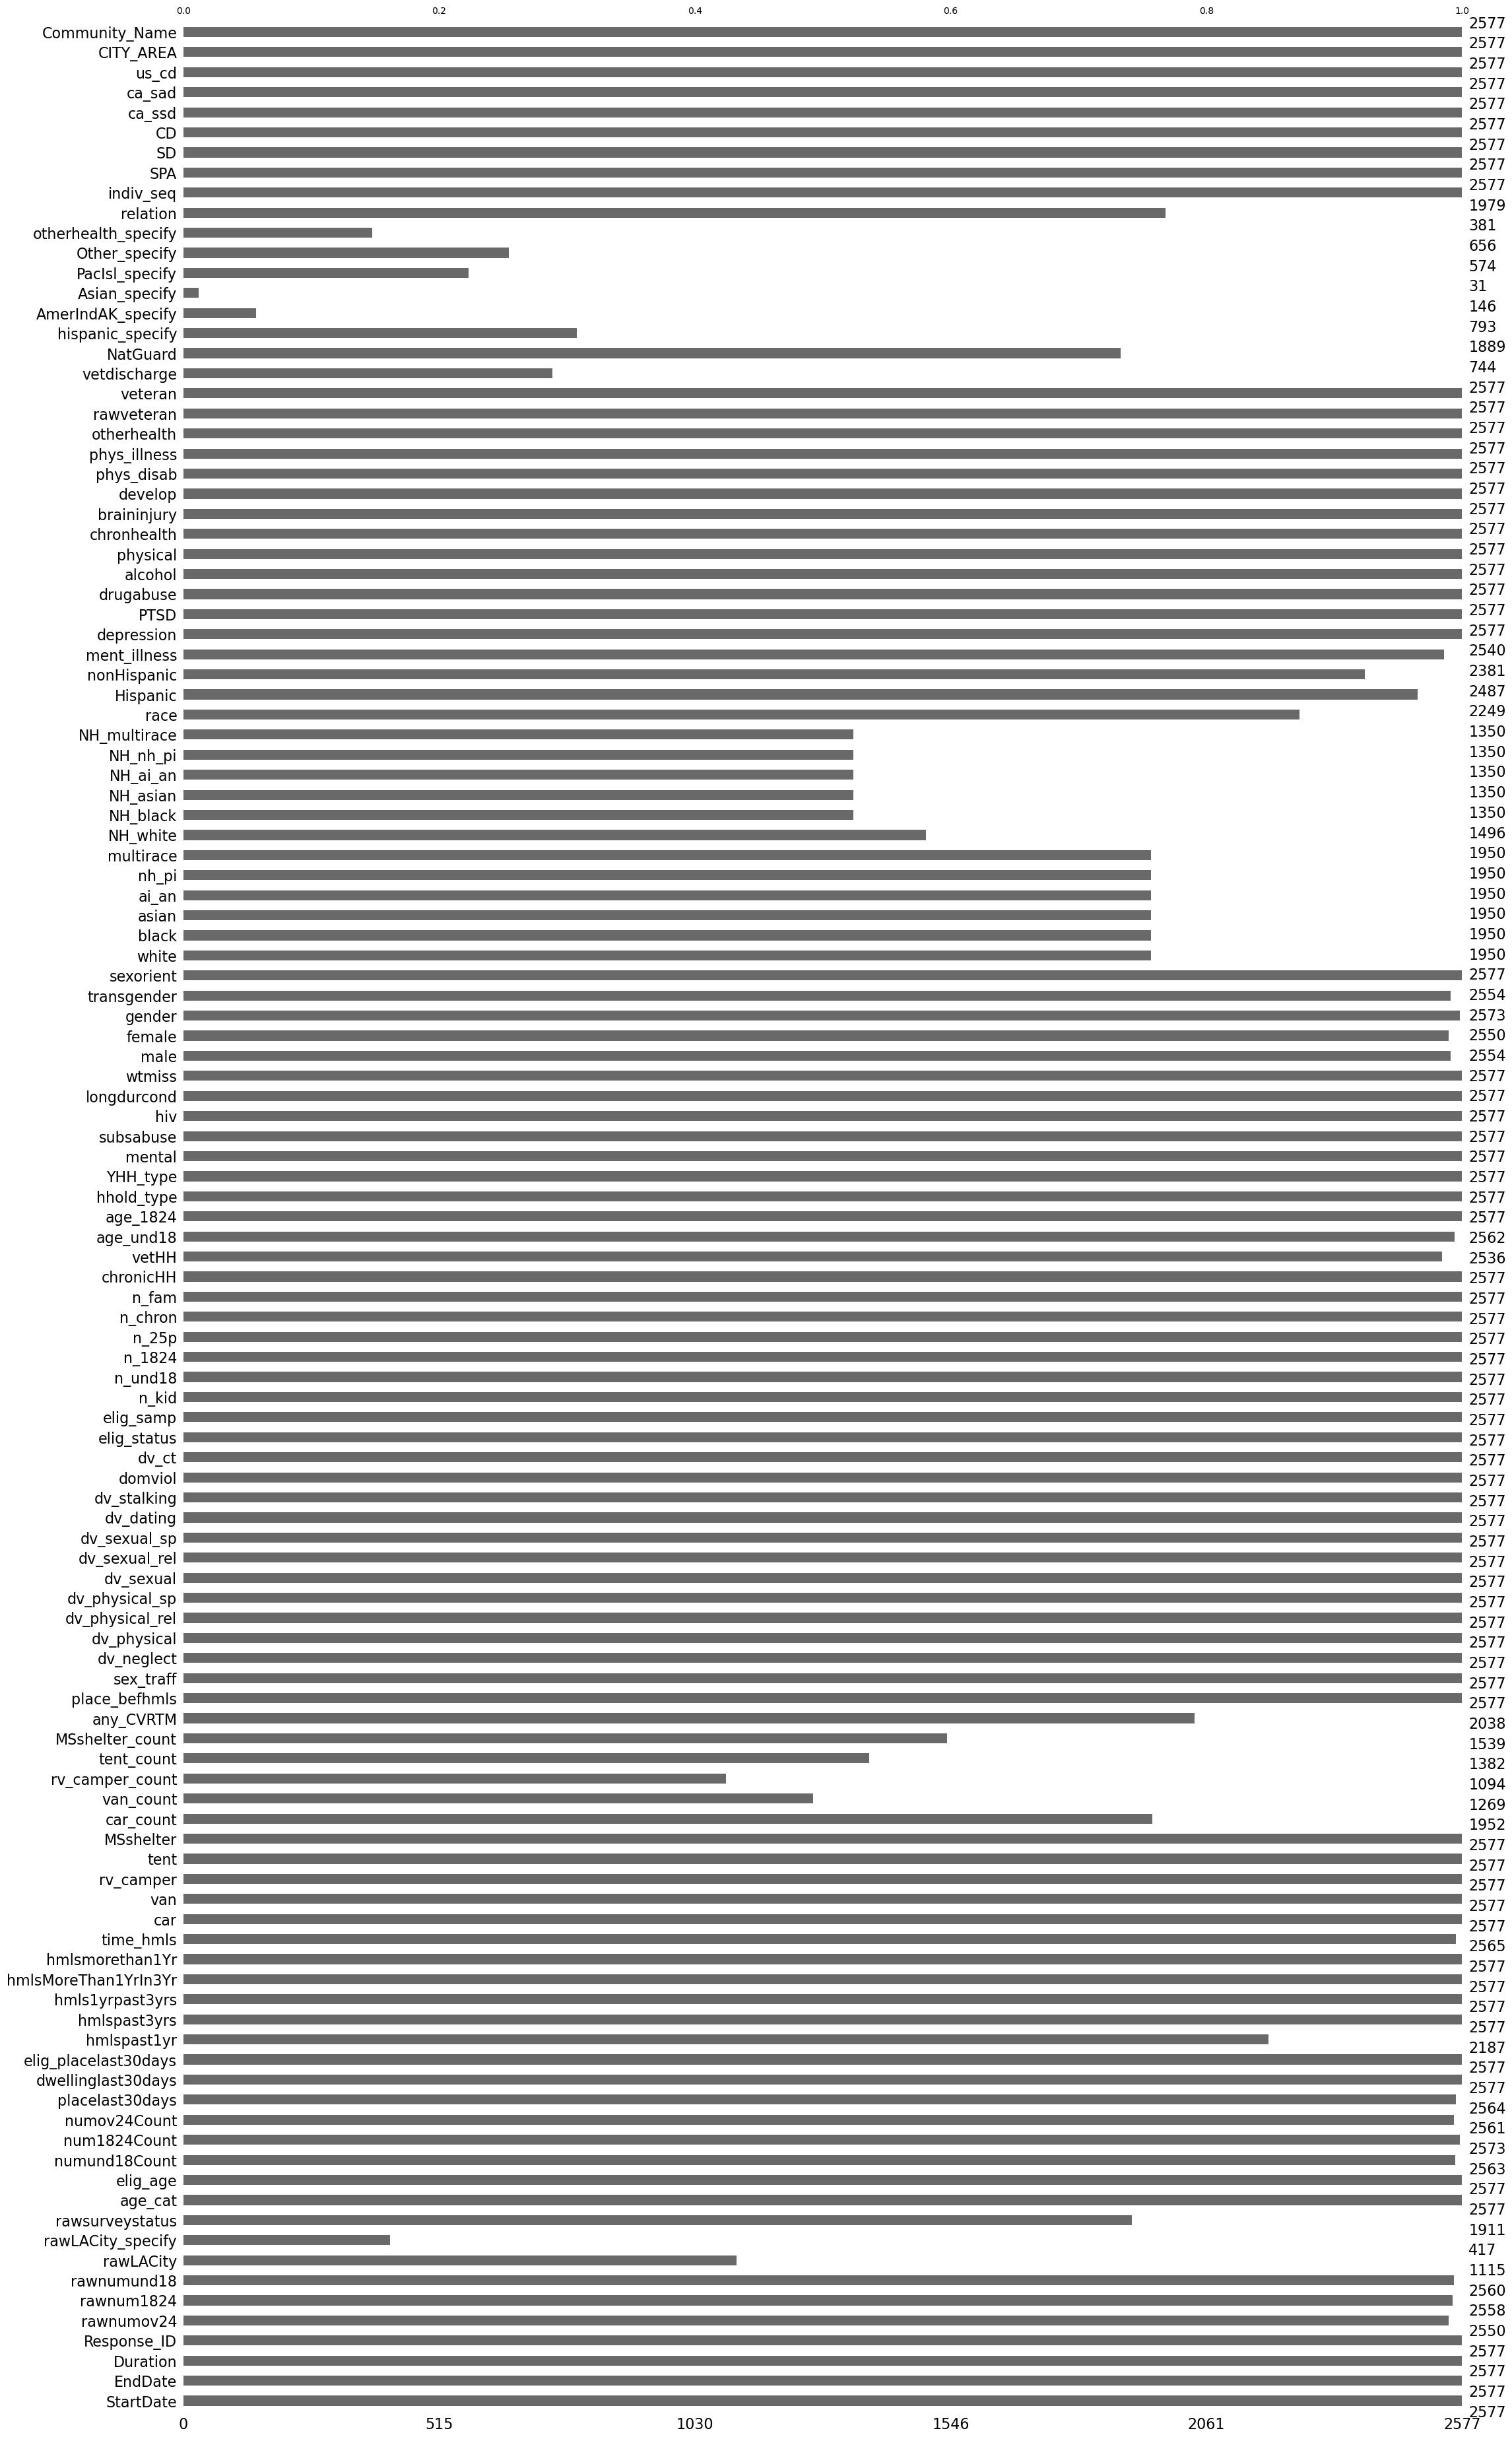

In [15]:
# Since we have more than 100 columns
# the msno bar chart shows
# how many missing values are in each column
# reference: https://github.com/ResidentMario/missingno
# identify which columns we may want to drop because
# there are too many missing values

import missingno as msno
%matplotlib inline
msno.bar(youth)

### List of Columns to Automatically Drop

Dropping columns if they have at least 1000 missing values or if they are not going to be used in EDA or Modeling
_______________

* Response_ID
* rawLACity
* rawLACity_specify
* van_count
* rv_camper_count
* tent_count
* MSshelter_count
* vetdischarge
* NatGuard
* hispanic_specify
* AmerIndAK_specify
* Asian_specify
* PacIsl_specify
* Other_specify
* otherhealth_specify
* NH_multirace
* NH_nh_pi
* NH_ai_an
* NH_asian
* NH_black
* NH_white

In [7]:
# dropping columns with too many missing values 
youth.drop(columns = ["Response_ID", "rawLACity", "rawLACity_specify", "van_count", "rv_camper_count", "tent_count",
                     "MSshelter_count", "vetdischarge", "NatGuard", "NH_multirace", "NH_nh_pi",
                      "NH_ai_an", "NH_asian", "NH_black", "NH_white", "hispanic_specify", "AmerIndAK_specify",
                     "Asian_specify", "PacIsl_specify", "Other_specify", "otherhealth_specify"], inplace = True)

In [8]:
# rechecking the data size
youth.shape

(2577, 98)

In [9]:
# Domestic Abuse: Stalking

# 0 - no
# 1 - yes
# R - refused
# S - skipped over
# D - don't know
# C - safety concern or not collected
# N - null 

youth["dv_stalking"].value_counts()

dv_stalking
0    2050
1     390
R      63
S      41
D      14
C      12
N       7
Name: count, dtype: int64

In [9]:
youth["dv_stalking"].dtypes

dtype('O')

In [20]:
# Whether serious mental illness of long duration (18+ only)
# 0 - no
# 1 - yes
# M - blank
# Y - unknown - can't seem to find what this stands for 2019 survey dataset
# A - due to age

youth["mental"].value_counts()

mental
0    1208
1    1093
M     137
Y      68
A      46
2      25
Name: count, dtype: int64

In [21]:
# Whether alcohol abuse (not necessarily long duration)

# 0 - no
# 1 - yes
# M - blank

youth["alcohol"].value_counts()

alcohol
0    2021
1     347
M     209
Name: count, dtype: int64

In [22]:
#'ment_illness', 'depression', 'PTSD', 'drugabuse', 'alcohol', 'physical', 
#'chronhealth', 'braininjury', 'develop', 'phys_disab', 'phys_illness', 
#'otherhealth'

youth["phys_illness"].value_counts()

phys_illness
0    2186
M     209
1     182
Name: count, dtype: int64

In [10]:
# Identifying the majority class and declaring baseline
# observation note: there is an imbalance between two classes.
# In this case with survey datasets, I will use
# the SMOTEN technique to balance out the two classes

# 0 seems to be the majority class regardless of 0.65
# 0.65 will be used as the baseline to compare the classification model's performance

# 0 represents youth who did not stay homeless more than 1 year this time
# 1 represents youth who did stay homeless more than 1 year this time

youth["hmlsmorethan1Yr"].value_counts(normalize=True)

hmlsmorethan1Yr
0    0.655413
1    0.344587
Name: proportion, dtype: float64

In [11]:
youth["hmlsmorethan1Yr"].dtypes

dtype('int64')

In [24]:
# taking a look in the homless more than 1 year 
# M - Blank

youth["hmlsMoreThan1YrIn3Yr"].value_counts()

hmlsMoreThan1YrIn3Yr
0    1682
M     631
1     264
Name: count, dtype: int64

In [25]:
# Whether lived in a tent last 6 months
# D - dont know
# R - refused

youth['tent'].value_counts()

tent
0    1718
1     804
D      28
R      27
Name: count, dtype: int64

In [26]:
# Whether lived in a car last 6 months
# D - dont know
# R - refused

youth['car'].value_counts()

car
0    1609
1     914
D      28
R      26
Name: count, dtype: int64

In [27]:
# Whether lived in a van last 6 months
# D - dont know
# R - refused

youth['van'].value_counts()

van
0    2071
1     450
R      28
D      28
Name: count, dtype: int64

## Demographic EDA
_________

I am not planning to use these columns as my features since they may lead to biased model performances due to likely undercount of ethnic composition of survey respondents

In [10]:
# Whether White
# 0 - No
# 1 - Yes

youth['white'].value_counts()

white
0.0    1238
1.0     712
Name: count, dtype: int64

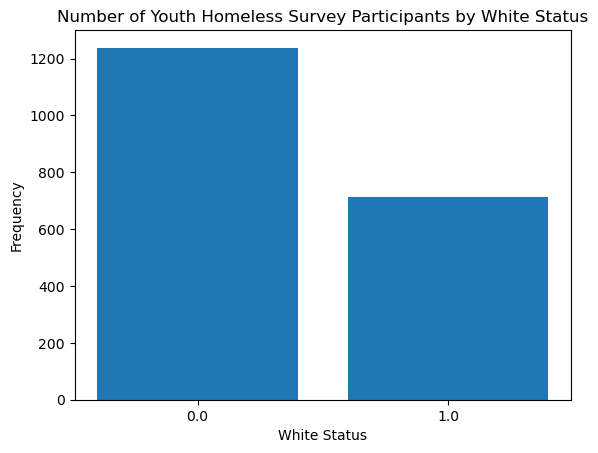

In [13]:
# Whether White bar chart
# 0 - No
# 1 - Yes

# Extracting the value counts of 'white'
white_counts = youth['white'].value_counts()

# Plotting the bar chart
plt.bar(white_counts.index.astype(str), white_counts.values)

# Adding title and labels
plt.title("Number of Youth Homeless Survey Participants by White Status")
plt.xlabel("White Status")
plt.ylabel("Frequency")

# Show plot
plt.show()

## Bar Interpretation for White Category
____

For the participants who responded to the youth homelessness survey, 1238 of them did not identify as White while 712 of them did identify themselves as White. 

In [14]:
# Whether Black / African-American
# 0 - No
# 1 - Yes
youth['black'].value_counts()

black
0.0    1031
1.0     919
Name: count, dtype: int64

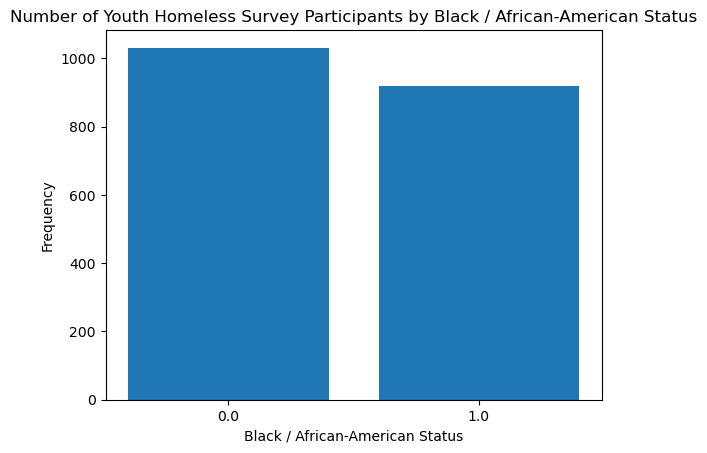

In [15]:
# Whether Black / African-American bar chart 

# Extracting the value counts of 'black'
black_counts = youth['black'].value_counts()

# Plotting the bar chart
plt.bar(black_counts.index.astype(str), black_counts.values)

# Adding title and labels
plt.title("Number of Youth Homeless Survey Participants by Black / African-American Status")
plt.xlabel("Black / African-American Status")
plt.ylabel("Frequency")

# Show plot
plt.show()

## Bar Interpretation for Black/African American Category 
____

For the participants who responded to the youth homelessness survey, 1238 of them did not identify as Black/African American while 919 of them did identify themselves as Black/African American.

In [16]:
# Whether Asian
# 0 - No
# 1 - Yes
youth['asian'].value_counts()

asian
0.0    1894
1.0      56
Name: count, dtype: int64

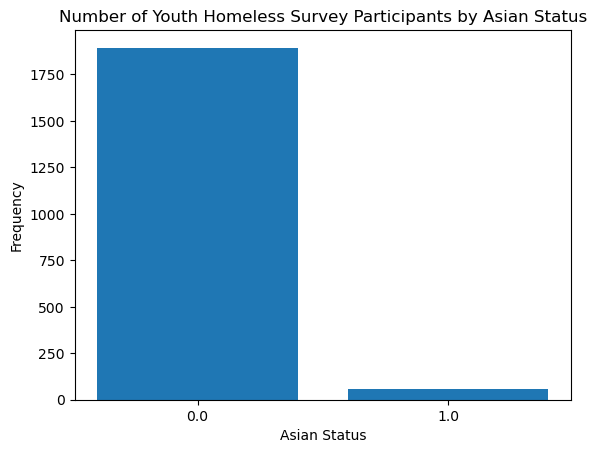

In [17]:
# Whether Asian bar chart

# Extracting the value counts of 'asian'
asian_counts = youth['asian'].value_counts()

# Plotting the bar chart
plt.bar(asian_counts.index.astype(str), asian_counts.values)

# Adding title and labels
plt.title("Number of Youth Homeless Survey Participants by Asian Status")
plt.xlabel("Asian Status")
plt.ylabel("Frequency")

# Show plot
plt.show()

## Bar Interpretation for Asian Category 
____

For the participants who responded to the youth homelessness survey, 1894 of them did not identify as Asian while 56 of them did identify themselves as Asian. 

In [18]:
# Whether American Indian/Alaska Native
# 0 - No
# 1 - Yes
youth['ai_an'].value_counts()

ai_an
0.0    1874
1.0      76
Name: count, dtype: int64

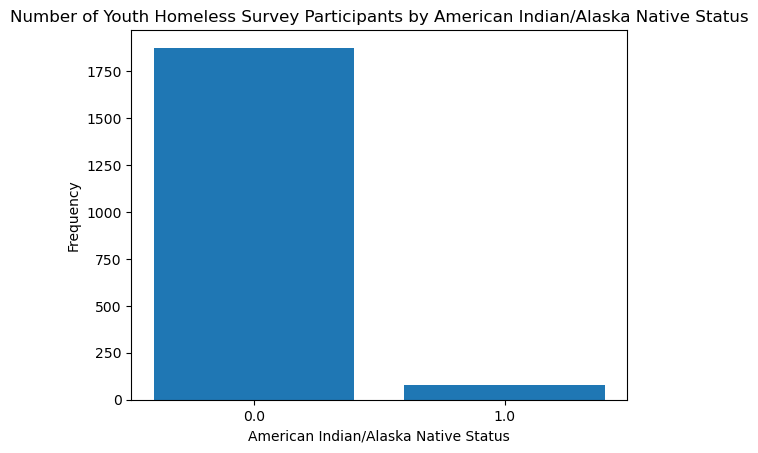

In [19]:
# Whether American Indian/Alaska Native bar chart

# Extracting the value counts of 'asian'
ai_an_counts = youth['ai_an'].value_counts()

# Plotting the bar chart
plt.bar(ai_an_counts.index.astype(str), ai_an_counts.values)

# Adding title and labels
plt.title("Number of Youth Homeless Survey Participants by American Indian/Alaska Native Status")
plt.xlabel("American Indian/Alaska Native Status")
plt.ylabel("Frequency")

# Show plot
plt.show()

## Bar Interpretation for American Indian/Alaska Native Category 
____

For the participants who responded to the youth homelessness survey, 1874 of them did not identify as American Indian/Alaska Native while 76 of them did identify themselves as American Indian/Alaska Native. 

In [20]:
# Whether Native Hawaiian/Pacific Islander
# 0 - No
# 1 - Yes
youth['nh_pi'].value_counts()

nh_pi
0.0    1928
1.0      22
Name: count, dtype: int64

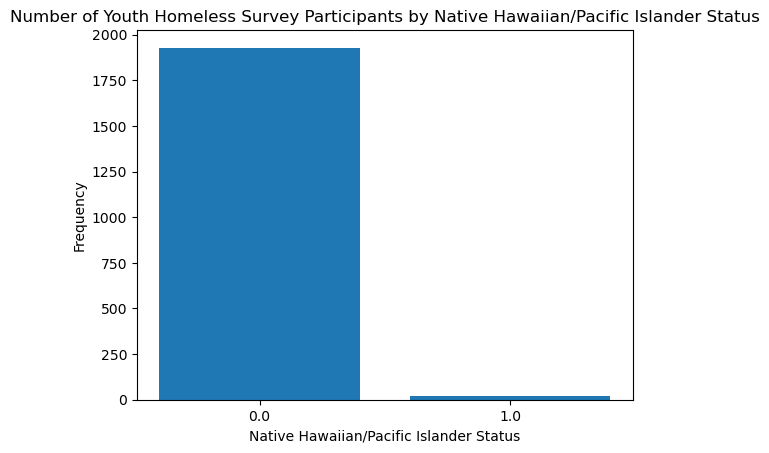

In [21]:
# Whether Native Hawaiian/Pacific Islander bar chart

# Extracting the value counts of 'nh_pi'
nh_pi_counts = youth['nh_pi'].value_counts()

# Plotting the bar chart
plt.bar(nh_pi_counts.index.astype(str), nh_pi_counts.values)

# Adding title and labels
plt.title("Number of Youth Homeless Survey Participants by Native Hawaiian/Pacific Islander Status")
plt.xlabel("Native Hawaiian/Pacific Islander Status")
plt.ylabel("Frequency")

# Show plot
plt.show()

## Bar Interpretation for Native Hawaiian/Pacific Islander Category 
____

For the participants who responded to the youth homelessness survey, 1928 of them did not identify as Native Hawaiian/Pacific Islander while 22 of them did identify themselves as Native Hawaiian/Pacific Islander. 

In [22]:
youth["Hispanic"].value_counts()

Hispanic
0.0    1039
1.0     637
0       419
1       286
M        87
R        10
D         9
Name: count, dtype: int64

In [23]:
1039 + 419

1458

In [26]:
# Whether Hispanic
# For 2017 survey, it contains D, M, R
# and not for 2018 and 2019

# 0 - No
# 1 - Yes
# D - don't know
# M - blank
# R - refused

youth['Hispanic'].value_counts()

Hispanic
0.0    1039
1.0     637
0       419
1       286
M        87
R        10
D         9
Name: count, dtype: int64

In [29]:
# Whether Hispanic


# 0 - No
# 1 - Yes
# 2 - M - Blank
# 3 - R - Refused
# 4 - D - Don't Know


# Define a mapping dictionary for encoding
#encoding_map = {'M': 2, 'R': 3, 'D': 4}
#
## Replace values in the 'Hispanic' column with their encoded counterparts
#youth['Hispanic'] = youth['Hispanic'].replace(encoding_map)
#
## Convert the 'Hispanic' column to int64 data type
#youth['Hispanic'] = youth['Hispanic'].astype('int64')
#
## Now, you can use the same method as before to sum the counts for each category
#Hispanic_counts = youth['Hispanic'].value_counts()
#
## Show the resulting counts
#print(Hispanic_counts)

In [25]:
youth['Hispanic'].dtypes

dtype('O')

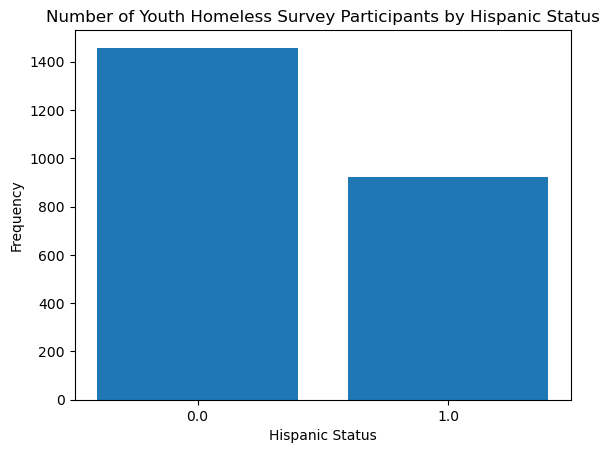

In [35]:
# Whether Hispanic Bar Chart

# Preprocess 'white' column to ensure consistency
youth['Hispanic'] = pd.to_numeric(youth['Hispanic'], errors='coerce')

# Combine counts for 0.0 and 0, as well as for 1.0 and 1
combined_counts = youth['Hispanic'].replace({0: 0.0, 1: 1.0}).value_counts().sort_index()

# Plotting the bar chart
plt.bar(combined_counts.index.astype(str), combined_counts.values)

# Adding title and labels
plt.title("Number of Youth Homeless Survey Participants by Hispanic Status")
plt.xlabel("Hispanic Status")
plt.ylabel("Frequency")

# Show plot
plt.show()

## Bar and Value Count Interpretation for Hispanic Category 
____

For the participants who responded to the youth homelessness survey, 1458 of them did not identify as Hispanic while 923 of them did identify themselves as Hispanic. 

In addition, 10 refused to identify whether they were Hispanic or not, 87 participants left this question blank, and 9 marked this question as "I don't know."  

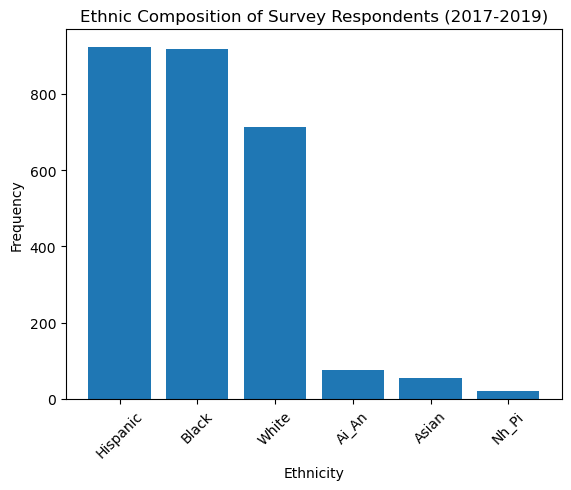

In [20]:
# Bar Chart of Ethnic Composition of Survey Respondents (2017-2019)

# Preprocess Hispanic column to ensure consistency
youth['Hispanic'] = pd.to_numeric(youth['Hispanic'], errors='coerce')

# Replace 1 with 1.0 in Hispanic column to ensure consistency
youth['Hispanic'] = youth['Hispanic'].replace({1: 1.0})

# Summing the counts of '1.0' across the specified columns
category_counts = youth[['white', 'black', 'asian', 'Hispanic', 'nh_pi', 'ai_an']].apply(lambda x: (x == 1.0).sum())

# Define new labels for each ethnic group
new_labels = ['White', 'Black', 'Asian', 'Hispanic', 'Nh_Pi', 'Ai_An']

# Sort the category_counts and new_labels in descending order
sorted_data = sorted(zip(new_labels, category_counts), key=lambda x: x[1], reverse=True)
sorted_labels = [x[0] for x in sorted_data]
sorted_counts = [x[1] for x in sorted_data]

# Plotting the bar chart with sorted data and renamed labels
plt.bar(sorted_labels, sorted_counts)

# Adding title and labels
plt.title("Ethnic Composition of Survey Respondents (2017-2019)")
plt.xlabel("Ethnicity")
plt.ylabel("Frequency")

# save figure
plt.savefig("ethnic_composition.png", dpi = 300)

# Show plot
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

## Bar Interpretation for Ethnic Composition of Survey Respondents (2017-2019)
_______

Analyzing the ethnic distribution across youth homelessness surveys from 2017 to 2019 reveals that Hispanic respondents comprised the largest group, followed by Black/African American respondents. White respondents ranked third, with American Indian/Alaska Natives following closely behind in fourth place. Asians occupied the fifth position, while Native Hawaiian/Pacific Islanders represented the smallest proportion.

However, this bar chart may likely be undercounting the actual number of ethnic composition of survey respondents given that this bar chart only represents the number of respondents who identified their ethnicities.

* Hispanic - 923 
* Black/African American - 919
* White - 712
* American Indian/Alaska Native - 76
* Asian - 56
* Native Hawaiian/Pacific Islander - 22

In [25]:
# breaking down race category based on white

# size
# plt.figure(figsize = (15, 8))
# 
# # bar chart
# plt.bar(youth['black'])
# 
# #title
# plt.title("Number of Participants Who Identified as White", fontsize = 15)
# 
# # rotate text on x axis
# plt.xticks(rotation = 25)
# 
# # add axis labels
# plt.xlabel("White", fontsize = 12)
# plt.ylabel("", fontsize = 12);

In [37]:
# replace all the values with 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, and 6.0 
# with 0, 1, 2, 3, 4, 5, 6

youth["Hispanic"] = youth["Hispanic"].replace({0.0: 0, 1.0: 1, 2.0: 2, 
                       3.0: 3, 4.0: 4, 5.0: 
                       5, 6.0: 6})

In [38]:
youth["Hispanic"].value_counts()

Hispanic
0.0    1458
1.0     923
Name: count, dtype: int64

## EDA for Selected Features
_____

Based on the [2015 report](https://oclawin.org/wp-content/uploads/2015/08/FactSheet_GeneralCauses_and_challenges_2015.pdf), some of the most common reasons why LA’S youth are homeless include economic and social issues at homes such as domestic violence and physical abuse. Sometimes, parents may also force children to leave because of their sexual orientation, social circle, drug use, or other reasons. 

Therefore, I plan to explore these specific columns before putting them in classification models:

Target Variable
* hmlsmorethan1Yr

Features
* SPA - READY
* dv_neglect - READY
* dv_physical
* dv_physical_rel
* dv_sexual_rel
* drugabuse
* subsabuse


In [10]:
# looking at the complete list of columns in youth
print(youth.columns.tolist())

['StartDate', 'EndDate', 'Duration', 'rawnumov24', 'rawnum1824', 'rawnumund18', 'rawsurveystatus', 'age_cat', 'elig_age', 'numund18Count', 'num1824Count', 'numov24Count', 'placelast30days', 'dwellinglast30days', 'elig_placelast30days', 'hmlspast1yr', 'hmlspast3yrs', 'hmls1yrpast3yrs', 'hmlsMoreThan1YrIn3Yr', 'hmlsmorethan1Yr', 'time_hmls', 'car', 'van', 'rv_camper', 'tent', 'MSshelter', 'car_count', 'any_CVRTM', 'place_befhmls', 'sex_traff', 'dv_neglect', 'dv_physical', 'dv_physical_rel', 'dv_physical_sp', 'dv_sexual', 'dv_sexual_rel', 'dv_sexual_sp', 'dv_dating', 'dv_stalking', 'domviol', 'dv_ct', 'elig_status', 'elig_samp', 'n_kid', 'n_und18', 'n_1824', 'n_25p', 'n_chron', 'n_fam', 'chronicHH', 'vetHH', 'age_und18', 'age_1824', 'hhold_type', 'YHH_type', 'mental', 'subsabuse', 'hiv', 'longdurcond', 'wtmiss', 'male', 'female', 'gender', 'transgender', 'sexorient', 'white', 'black', 'asian', 'ai_an', 'nh_pi', 'multirace', 'race', 'Hispanic', 'nonHispanic', 'ment_illness', 'depression', 

In [23]:
# youth.drop(columns = ['StartDate', 'EndDate', 'Duration', 'rawnumov24', 'rawnum1824', 
#                        'rawnumund18', 'rawsurveystatus', 'age_cat', 'elig_age', 'numund18Count', 
#                        'num1824Count', 'numov24Count', 'placelast30days', 'dwellinglast30days', 
#                        'elig_placelast30days', 'hmlspast1yr', 'hmlspast3yrs', 'hmls1yrpast3yrs', 
#                        'hmlsMoreThan1YrIn3Yr', 'time_hmls', 'car', 'van', 'rv_camper', 
#                        'tent', 'MSshelter', 'car_count', 'any_CVRTM', 'place_befhmls', 'sex_traff', 
#                        'dv_neglect', 'dv_physical_sp', 
#                        'dv_sexual', 'dv_sexual_rel', 'dv_sexual_sp', 'dv_dating', 'dv_stalking', 
#                        'domviol', 'dv_ct', 'elig_status', 'elig_samp', 'n_kid', 'n_und18', 'n_1824', 
#                        'n_25p', 'n_chron', 'n_fam', 'chronicHH', 'vetHH', 'age_und18', 'age_1824', 
#                        'hhold_type', 'YHH_type', 'mental', 'hiv', 'longdurcond', 
#                        'wtmiss', 'male', 'female', 'gender', 'transgender', 
#                        'white', 'black', 'asian', 'ai_an', 'nh_pi', 'multirace', 'race', 
#                        'Hispanic', 'nonHispanic', 'ment_illness', 'depression', 'PTSD', 
#                        'alcohol', 'physical', 'chronhealth', 'braininjury', 
#                        'develop', 'phys_disab', 'phys_illness', 'otherhealth', 
#                        'rawveteran', 'veteran', 'relation',
#                        'indiv_seq', 'SD', 'CD', 'ca_ssd', 'ca_sad', 'us_cd', 
#                        'CITY_AREA', 'Community_Name'], inplace = True)

In [34]:
youth.shape

(2577, 98)

In [15]:
# Domestic Abuse: Neglect

# 0 - No
# 1 - Yes
# R - Refused
# S - Skipped Over
# D - Don't know
# C - Safety concern or not collected
# N - Null

youth['dv_neglect'].value_counts()

dv_neglect
0    1646
1     794
R      63
S      41
D      14
C      12
N       7
Name: count, dtype: int64

In [16]:
# Domestic Abuse: Neglect
# dv_neglect

# 0 - No
# 1 - Yes
# 2 - R -  Refused
# 3 - S -  Skipped Over
# 4 - D -  Don't know
# 5 - C -  Safety concern or not collected
# 6 - N -  Null

# Define a mapping dictionary for encoding
encoding_map = {'R': 2, 'S': 3, 'D': 4, 'C': 5, 'N': 6}

# Replace values in the 'dv_neglect' column with their encoded counterparts
youth['dv_neglect'] = youth['dv_neglect'].replace(encoding_map)

# Convert the 'dv_neglect' column to int64 data type
youth['dv_neglect'] = youth['dv_neglect'].astype('int64')

# Now, you can use the same method as before to sum the counts for each category
dv_neglect_counts = youth['dv_neglect'].value_counts()

# Show the resulting counts
print(dv_neglect_counts)

dv_neglect
0    1646
1     794
2      63
3      41
4      14
5      12
6       7
Name: count, dtype: int64


In [17]:
# Domestic Abuse: Neglect

# 0 - No
# 1 - Yes
# 2 - R - Refused
# 3 - S - Skipped Over
# 4 - D - Don't know
# 5 - C - Safety concern or not collected
# 6 - N - Null

youth['dv_neglect'].value_counts()

dv_neglect
0    1646
1     794
2      63
3      41
4      14
5      12
6       7
Name: count, dtype: int64

In [18]:
# Domestic Abuse: Physical abuse

# R - 2 - refused
# D - 3 - don't know
# C - 4 - safety concern or not collected
# N - 5 - Null

youth['dv_physical'].value_counts()

dv_physical
0    1582
1     899
R      63
D      14
C      12
N       7
Name: count, dtype: int64

In [19]:
# Domestic Abuse: Physical abuse

# 0 - No
# 1 - Yes
# R - 2 - refused
# D - 3 - don't know
# C - 4 - safety concern or not collected
# N - 5 - Null

# Define a mapping dictionary for encoding
encoding_map = {'R': 2, 'D': 3, 'C': 4, 'N': 5}

# Replace values in the 'dv_physical' column with their encoded counterparts
youth['dv_physical'] = youth['dv_physical'].replace(encoding_map)

# Convert the 'dv_physical' column to int64 data type
youth['dv_physical'] = youth['dv_physical'].astype('int64')

# Now, you can use the same method as before to sum the counts for each category
dv_physical_counts = youth['dv_physical'].value_counts()

# Show the resulting counts
print(dv_physical_counts)

dv_physical
0    1582
1     899
2      63
3      14
4      12
5       7
Name: count, dtype: int64


In [20]:
youth['dv_physical'].value_counts()

dv_physical
0    1582
1     899
2      63
3      14
4      12
5       7
Name: count, dtype: int64

In [21]:
# Domestic Abuse: Physical abuse by parent
# dv_physical_rel

# 0 - No
# 1 - Yes
# R - Refused
# S - Skipped Over
# D - Don't Know
# C - Safety concern or not collected
# N - Null

youth["dv_physical_rel"].value_counts()

dv_physical_rel
0    1741
1     699
R      63
S      41
D      14
C      12
N       7
Name: count, dtype: int64

In [22]:
# Domestic Abuse: Physical abuse by parent
# dv_physical_rel

# 2 - R - Refused
# 3 - S - Skipped Over
# 4 - D - Don't Know
# 5 - C - Safety concern or not collected
# 6 - N - Null

# Define a mapping dictionary for encoding
encoding_map = {'R': 2, 'S': 3, 'D': 4, 'C': 5, 'N': 6}

# Replace values in the 'dv_physical_rel' column with their encoded counterparts
youth['dv_physical_rel'] = youth['dv_physical_rel'].replace(encoding_map)

# Convert the 'dv_physical_rel' column to int64 data type
youth['dv_physical_rel'] = youth['dv_physical_rel'].astype('int64')

# Now, you can use the same method as before to sum the counts for each category
dv_physical_rel_counts = youth['dv_physical_rel'].value_counts()

# Show the resulting counts
print(dv_physical_rel_counts)

dv_physical_rel
0    1741
1     699
2      63
3      41
4      14
5      12
6       7
Name: count, dtype: int64


In [23]:
# double checking
youth['dv_physical_rel'].value_counts()

dv_physical_rel
0    1741
1     699
2      63
3      41
4      14
5      12
6       7
Name: count, dtype: int64

In [24]:
# Domestic Abuse: Sexual abuse by parent

# dv_sexual_rel

# 0 - No
# 1 - Yes
# R - Refused
# S - Skipped Over
# D - Don't Know
# C - Safety concern or not collected
# N - Null

youth['dv_sexual_rel'].value_counts()

dv_sexual_rel
0    2088
1     368
R      63
S      25
D      14
C      12
N       7
Name: count, dtype: int64

In [25]:
# Domestic Abuse: Sexual abuse by parent

# dv_sexual_rel

# 2 - R - Refused
# 3 - S - Skipped Over
# 4 - D - Don't Know
# 5 - C - Safety concern or not collected
# 6 - N - Null

# Define a mapping dictionary for encoding
encoding_map = {'R': 2, 'S': 3, 'D': 4, 'C': 5, 'N': 6}

# Replace values in the 'dv_sexual_rel' column with their encoded counterparts
youth['dv_sexual_rel'] = youth['dv_sexual_rel'].replace(encoding_map)

# Convert the 'dv_sexual_rel' column to int64 data type
youth['dv_sexual_rel'] = youth['dv_sexual_rel'].astype('int64')

# Now, you can use the same method as before to sum the counts for each category
dv_sexual_rel_counts = youth['dv_sexual_rel'].value_counts()

# Show the resulting counts
print(dv_sexual_rel_counts)

dv_sexual_rel
0    2088
1     368
2      63
3      25
4      14
5      12
6       7
Name: count, dtype: int64


In [26]:
# double checking
youth['dv_sexual_rel'].value_counts()

dv_sexual_rel
0    2088
1     368
2      63
3      25
4      14
5      12
6       7
Name: count, dtype: int64

In [27]:
# Whether drug abuse (not necessarily long duration)
# drugabuse
# M - blank

youth['drugabuse'].value_counts()

drugabuse
0    1901
1     467
M     209
Name: count, dtype: int64

In [28]:
# Whether drug abuse (not necessarily long duration)

# 2 - M - blank

# Define a mapping dictionary for encoding
encoding_map = {'M': 2}

# Replace values in the 'drugabuse' column with their encoded counterparts
youth['drugabuse'] = youth['drugabuse'].replace(encoding_map)

# Convert the 'drugabuse' column to int64 data type
youth['drugabuse'] = youth['drugabuse'].astype('int64')

# Now, you can use the same method as before to sum the counts for each category
drugabuse_counts = youth['drugabuse'].value_counts()

# Show the resulting counts
print(drugabuse_counts)

drugabuse
0    1901
1     467
2     209
Name: count, dtype: int64


In [29]:
youth['drugabuse'].dtypes

dtype('int64')

In [30]:
# Whether substance abuse problem of long duration (18+ only)
# 
# 0 - No
# 1 - Yes
# M - blank
# Y - Unknown
# A - due to age

youth['subsabuse'].value_counts()

subsabuse
0    1990
1     257
M     192
Y      92
A      46
Name: count, dtype: int64

In [31]:
# Whether substance abuse problem of long duration (18+ only)

# 0 - No
# 1 - Yes
# 2 - M - blank
# 3 - Y - unknown
# 4 - A - due to age

# Define a mapping dictionary for encoding
encoding_map = {'M': 2, 'Y': 3, 'A': 4}

# Replace values in the 'subsabuse' column with their encoded counterparts
youth['subsabuse'] = youth['subsabuse'].replace(encoding_map)

# Convert the 'subsabuse' column to int64 data type
youth['subsabuse'] = youth['subsabuse'].astype('int64')

# Now, you can use the same method as before to sum the counts for each category
subsabuse_counts = youth['subsabuse'].value_counts()

# Show the resulting counts
print(subsabuse_counts)

subsabuse
0    1990
1     257
2     192
3      92
4      46
Name: count, dtype: int64


In [32]:
youth['subsabuse'].dtypes

dtype('int64')

In [11]:
# Target Variable
# 
#     hmlsmorethan1Yr
# 
# Features
# 
#     SPA - READY
#     dv_neglect - READY
#     dv_physical
#     dv_physical_rel
#     dv_sexual_rel
#     drugabuse
#     subsabuse


youth.drop(columns = ['StartDate', 'EndDate', 'Duration', 'rawnumov24', 'rawnum1824', 
                       'rawnumund18', 'rawsurveystatus', 'age_cat', 'elig_age', 'numund18Count', 
                       'num1824Count', 'numov24Count', 'placelast30days', 'dwellinglast30days', 
                       'elig_placelast30days', 'hmlspast1yr', 'hmlspast3yrs', 'hmls1yrpast3yrs', 
                       'hmlsMoreThan1YrIn3Yr', 'time_hmls', 'car', 'van', 'rv_camper', 
                       'tent', 'MSshelter', 'car_count', 
                       'any_CVRTM', 'place_befhmls', 'sex_traff','dv_physical_sp', 
                       'dv_sexual', 'dv_sexual_sp', 'dv_dating', 'dv_stalking', 
                       'domviol', 'dv_ct', 'elig_status', 'elig_samp', 'n_kid', 'n_und18', 'n_1824', 
                       'n_25p', 'n_chron', 'n_fam', 'chronicHH', 'vetHH', 'age_und18', 'age_1824', 
                       'hhold_type', 'YHH_type', 'mental', 'hiv', 'longdurcond', 
                       'wtmiss', 'male', 'female', 'gender', 'transgender', 
                       'white', 'black', 'asian', 'ai_an', 'nh_pi', 'multirace', 'race', 
                       'Hispanic', 'nonHispanic', 'ment_illness', 'depression', 'PTSD', 
                       'alcohol', 'physical', 'chronhealth', 'braininjury', 
                       'develop', 'phys_disab', 'phys_illness', 'otherhealth', 
                       'rawveteran', 'veteran', 'relation',
                       'indiv_seq', 'SD', 'CD', 'ca_ssd', 'ca_sad', 'us_cd', 
                       'CITY_AREA', 'Community_Name'], inplace = True)

In [33]:
youth.head()

,hmlsmorethan1Yr,dv_neglect,dv_physical,dv_physical_rel,dv_sexual_rel,subsabuse,drugabuse,SPA
0,1,1,1,1,0,0,0,4
1,1,0,0,0,1,0,0,4
2,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,4


In [34]:
youth.dtypes

hmlsmorethan1Yr    int64
dv_neglect         int64
dv_physical        int64
dv_physical_rel    int64
dv_sexual_rel      int64
subsabuse          int64
drugabuse          int64
SPA                int64
dtype: object

In [14]:
youth.drop(columns = ['sexorient'], inplace = True)

In [53]:
youth.dtypes

hmlsmorethan1Yr    int64
dv_neglect         int64
dv_physical        int64
dv_physical_rel    int64
dv_sexual_rel      int64
subsabuse          int64
drugabuse          int64
SPA                int64
dtype: object

In [35]:
youth.isnull().sum()

hmlsmorethan1Yr    0
dv_neglect         0
dv_physical        0
dv_physical_rel    0
dv_sexual_rel      0
subsabuse          0
drugabuse          0
SPA                0
dtype: int64

In [55]:
# exporting the new dataset for modeling purposes
youth.to_csv('../capstone_project/datasets/youth_model.csv', index=False)

In [2]:
# reading the youth model dataset 
youth_model = pd.read_csv("datasets/youth_model.csv")

youth_model.head()

,hmlsmorethan1Yr,dv_neglect,dv_physical,dv_physical_rel,dv_sexual_rel,subsabuse,drugabuse,SPA
0,1,1,1,1,0,0,0,4
1,1,0,0,0,1,0,0,4
2,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,4


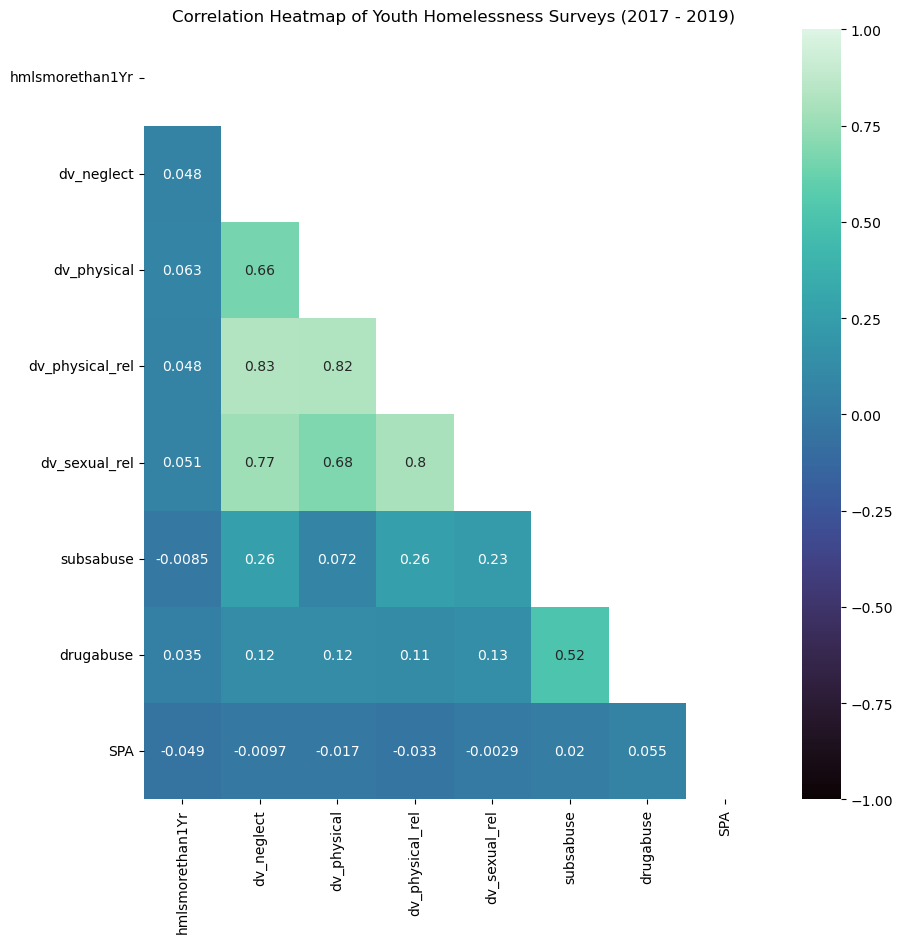

In [38]:
# Correlation with current youth dataset frame

# Establish size of figure.
plt.figure(figsize=(10, 10))

# title of the heatmap
plt.title("Correlation Heatmap of Youth Homelessness Surveys (2017 - 2019)")

# Get correlation of variables.
corr = youth.corr(numeric_only=True)

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask=mask, annot=True, cmap = 'mako', vmax = 1, vmin = -1)

# save figure
plt.savefig("heatmap_correlation", dpi = 200);

# Correlation Heatmap Interpretation
__________

Considering the correlation between "hmlsmorethan1Yr" and "dv_neglect" (0.048391), it suggests a very weak positive correlation between these two variables. On the other hand, the correlation between "dv_physical" and "dv_physical_rel" (0.820838) indicates a strong positive correlation, implying that these two variables tend to move together closely. 


In [44]:
youth.corr(numeric_only=True)

,hmlsmorethan1Yr,dv_neglect,dv_physical,dv_physical_rel,dv_sexual_rel,subsabuse,drugabuse,SPA
hmlsmorethan1Yr,1.000000,0.048391,0.062527,0.048267,0.051208,-0.008456,0.035461,-0.049449
dv_neglect,0.048391,1.000000,0.658267,0.834137,0.766021,0.262438,0.124978,-0.009739
dv_physical,0.062527,0.658267,1.000000,0.820838,0.683266,0.072149,0.118604,-0.016630
dv_physical_rel,0.048267,0.834137,0.820838,1.000000,0.801237,0.257085,0.112495,-0.033073
dv_sexual_rel,0.051208,0.766021,0.683266,0.801237,1.000000,0.234065,0.133964,-0.002917
subsabuse,-0.008456,0.262438,0.072149,0.257085,0.234065,1.000000,0.518186,0.020070
drugabuse,0.035461,0.124978,0.118604,0.112495,0.133964,0.518186,1.000000,0.055436
SPA,-0.049449,-0.009739,-0.016630,-0.033073,-0.002917,0.020070,0.055436,1.000000


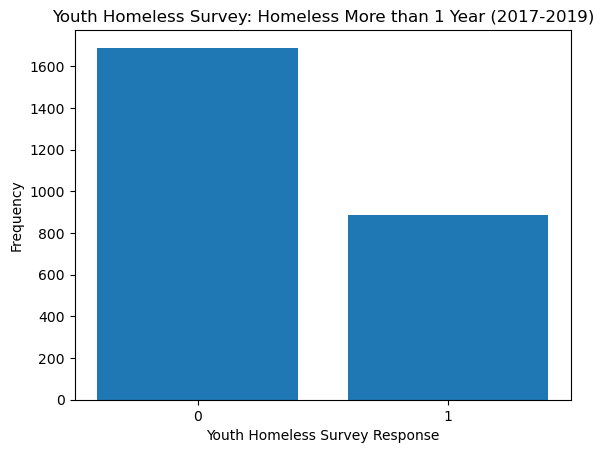

In [38]:
# homeless more than 1 year this time
# hmlsmorethan1Yr

youth['hmlsmorethan1Yr'].value_counts()

# hmlsmorethan1Yr chart

# Extracting the value counts of 'hmlsmorethan1Yr'
hmlsmorethan1Yr_counts = youth['hmlsmorethan1Yr'].value_counts()

# Plotting the bar chart
plt.bar(hmlsmorethan1Yr_counts.index.astype(str), hmlsmorethan1Yr_counts.values)

# Adding title and labels
plt.title("Youth Homeless Survey: Homeless More than 1 Year (2017-2019)")
plt.xlabel("Youth Homeless Survey Response")
plt.ylabel("Frequency")

# save figure
plt.savefig("barchart_SPA", dpi = 300)

# Show plot
plt.show();

# Bar Interpretation on More than 1 Year of Homeless
_______

Based on the observation here, we observe that 1689 respondents did not stay homeless for more than 1 year while 888 respondents did experience homelessness more than 1 year. 

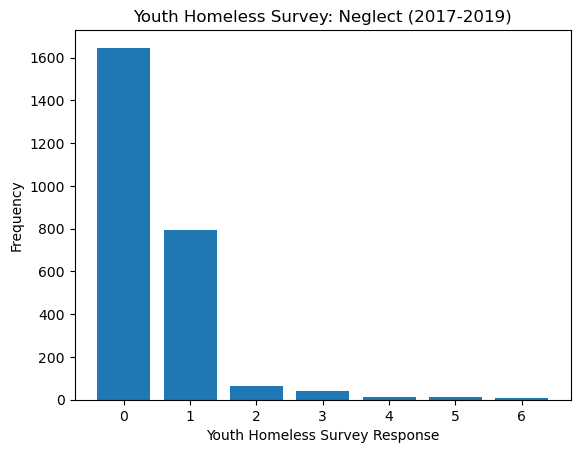

In [40]:
# dv_neglect

youth['dv_neglect'].value_counts()

# dv_neglect chart

# Extracting the value counts of 'dv_neglect'
dv_neglect_counts = youth['dv_neglect'].value_counts()

# Plotting the bar chart
plt.bar(dv_neglect_counts.index.astype(str), dv_neglect_counts.values)

# Adding title and labels
plt.title("Youth Homeless Survey: Neglect (2017-2019)")
plt.xlabel("Youth Homeless Survey Response")
plt.ylabel("Frequency")

# save figure
plt.savefig("dv_neglect", dpi = 300)

# Show plot
plt.show();

# Bar Interpretation of Neglect
____

From this bar chart, we see that there were 1646 people who responded not experiencing neglect while 794 responded with having experienced neglect. 

On the other hand, 63 people refused to answer this specific question while 41 people skipped over this question. 14 people were not sure whether they experienced neglect while it was hard to collect responses from 12 people due to safety concerns. 7 people left this question unanswered. 

* 0 - No
* 1 - Yes
* 2 - R - Refused
* 3 - S - Skipped Over
* 4 - D - Don't know
* 5 - C - Safety concern or not collected
* 6 - N - Null

In [47]:
youth['dv_neglect'].value_counts()

dv_neglect
0    1646
1     794
2      63
3      41
4      14
5      12
6       7
Name: count, dtype: int64

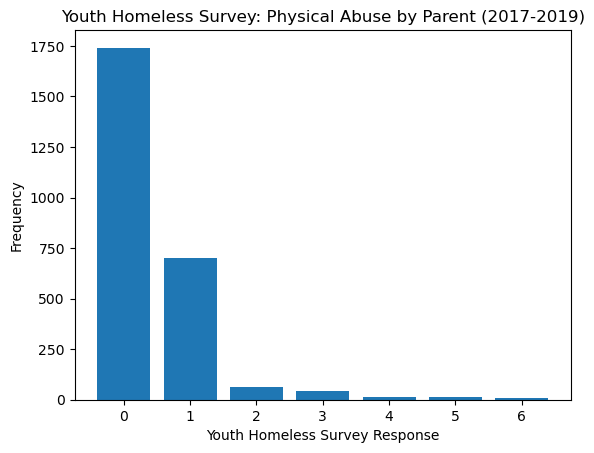

In [48]:

# Domestic Abuse: Physical abuse by parent
# dv_physical_rel

#youth['dv_physical_rel'].value_counts()

# Extracting the value counts of 'dv_physical_rel'
dv_physical_rel_counts = youth['dv_physical_rel'].value_counts()

# Plotting the bar chart
plt.bar(dv_physical_rel_counts.index.astype(str), dv_physical_rel_counts.values)

# Adding title and labels
plt.title("Youth Homeless Survey: Physical Abuse by Parent (2017-2019)")
plt.xlabel("Youth Homeless Survey Response")
plt.ylabel("Frequency")

# save figure
plt.savefig("dv_physical_rel", dpi = 300)

# Show plot
plt.show();

# Bar Chart Interpretation for Physical Abuse by Parent
_______

There were 1741 respondents who reported of not experiencing physical abuse by their parents while there were 699 people who reported of experiencing physical abuse by their parents. 

On the other hand, 63 people refused to answer this specific question while 41 people skipped over this question. 14 people were not sure whether they experienced physical abuse by their parents while it was hard to collect responses from 12 people due to safety concerns. 7 people left this question unanswered. 
 
* 2 - R - Refused
* 3 - S - Skipped Over
* 4 - D - Don't Know
* 5 - C - Safety concern or not collected
* 6 - N - Null

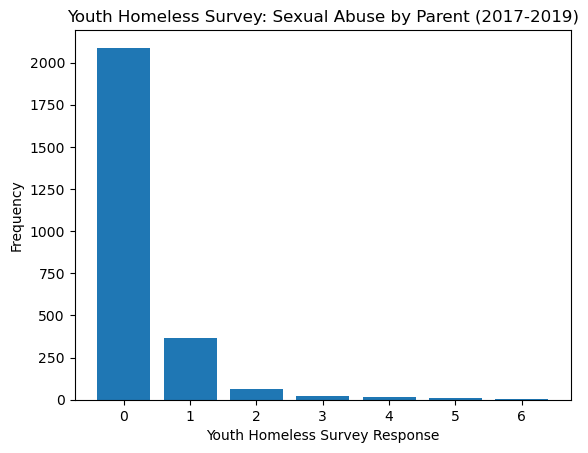

In [52]:
# Domestic Abuse: Sexual abuse by parent
# dv_sexual_rel

# youth['dv_sexual_rel'].value_counts()

# dv_sexual_rel chart

# Extracting the value counts of 'dv_sexual_rel'
dv_sexual_rel_counts = youth['dv_sexual_rel'].value_counts()

# Plotting the bar chart
plt.bar(dv_sexual_rel_counts.index.astype(str), dv_sexual_rel_counts.values)

# Adding title and labels
plt.title("Youth Homeless Survey: Sexual Abuse by Parent (2017-2019)")
plt.xlabel("Youth Homeless Survey Response")
plt.ylabel("Frequency")

# save figure
plt.savefig("dv_sexual_rel", dpi = 300)

# Show plot
plt.show();

# Bar Interpretation on Youth Homeless Survey: Sexual Abuse by Parent
_________

There were 2088 respondents who reported of not experiencing sexual abuse by their parents while there were 368 people who reported of experiencing physical abuse by their parents.

On the other hand, 63 people refused to answer this specific question while 25 people skipped over this question. 14 people were not sure whether they experienced physical abuse by their parents while it was hard to collect responses from 12 people due to safety concerns. 7 people left this question unanswered. 


* 2 - R - Refused
* 3 - S - Skipped Over
* 4 - D - Don't Know
* 5 - C - Safety concern or not collected
* 6 - N - Null

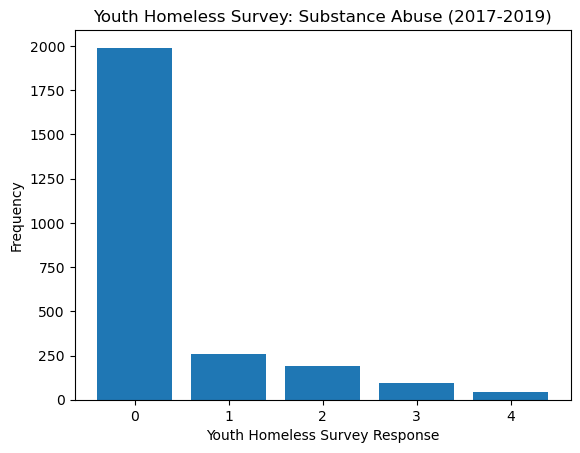

In [55]:
# Whether substance abuse problem of long duration (18+ only)

# 0 - No
# 1 - Yes
# 2 - M - blank
# 3 - Y - unknown
# 4 - A - due to age


# youth['subsabuse'].value_counts()

# subsabuse chart

# Extracting the value counts of 'subsabuse'
subsabuse_counts = youth['subsabuse'].value_counts()

# Plotting the bar chart
plt.bar(subsabuse_counts.index.astype(str), subsabuse_counts.values)

# Adding title and labels
plt.title("Youth Homeless Survey: Substance Abuse (2017-2019)")
plt.xlabel("Youth Homeless Survey Response")
plt.ylabel("Frequency")

# save figure
plt.savefig("subsabuse", dpi = 300)

# Show plot
plt.show();

# Bar Interpretation On Substance Abuse
_________

There were 1990 respondents who reported of not dealing with substance abuse while there were 257 people who dealt with substance abuse.

On the other hand, 192 people left this specific question blank while 92 people responded with Y. However, this question was not applicable 46 people, who were younger than 18+. 

* 0 - No
* 1 - Yes
* 2 - M - blank
* 3 - Y - unknown
* 4 - A - due to age


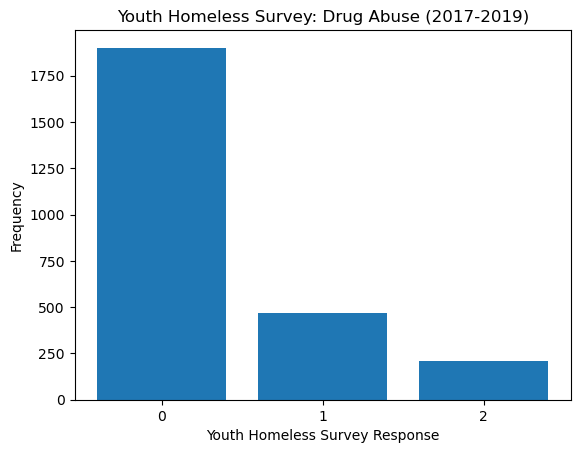

In [58]:
# Extracting the value counts of 'drugabuse'
drugabuse_counts = youth['drugabuse'].value_counts()

# Plotting the bar chart
plt.bar(drugabuse_counts.index.astype(str), drugabuse_counts.values)

# Adding title and labels
plt.title("Youth Homeless Survey: Drug Abuse (2017-2019)")
plt.xlabel("Youth Homeless Survey Response")
plt.ylabel("Frequency")

# save figure
plt.savefig("drugabuse", dpi = 300)

# Show plot
plt.show();

# Bar Interpretation On Drug Abuse
________

There were 1901 respondents who reported of not dealing with drug abuse while there were 467 people who dealt with drug abuse. On the other hand, 209 people left this specific question blank. 


In [3]:
# Service Planning Area (SPA)
# for more info: http://publichealth.lacounty.gov/chs/SPAMain/ServicePlanningAreas.htm

# youth['dv_physical'].value_counts()
# youth['sexorient'].value_counts()
# youth['drugabuse'].value_counts()
# youth['dv_sexual_rel'].value_counts()
# youth['subsabuse'].value_counts()




youth['SPA'].value_counts()

SPA
4    874
5    584
6    295
2    283
1    222
7    196
8     75
3     48
Name: count, dtype: int64

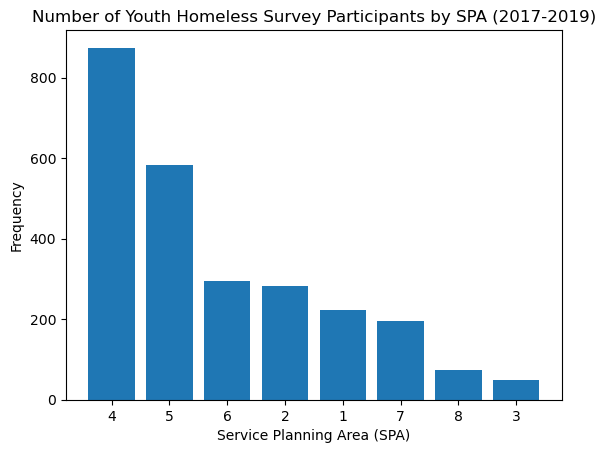

In [41]:
# SPA chart

# Extracting the value counts of 'SPA'
spa_counts = youth['SPA'].value_counts()

# Plotting the bar chart
plt.bar(spa_counts.index.astype(str), spa_counts.values)

# Adding title and labels
plt.title("Number of Youth Homeless Survey Participants by SPA (2017-2019)")
plt.xlabel("Service Planning Area (SPA)")
plt.ylabel("Frequency")

# save figure
plt.savefig("barchart_SPA", dpi = 300)

# Show plot
plt.show();

## Bar Interpretation for Survey Respondents Based on SPA
________

The youth homelessness surveys from 2017 to 2019 reveal that respondents from SPA 4 - consisting of neighborhoods like Boyle Heights, Central City, Downtown LA, Echo Park, El Sereno, Hollywood, Mid-City Wilshire, and Westlake - make up as the largest group.

As the second largest group, the respondents are from SPA 5, which consist of neighborhood such as Bel Air, Beverly Hills, Brentwood, Culver City, Ladera, and Malibu. 

Here is some more [information](http://publichealth.lacounty.gov/chs/SPAMain/ServicePlanningAreas.htm) about LA's Service Planning Area (SPA).

* SPA 4: 874
* SPA 5: 584
* SPA 6: 295
* SPA 2: 283
* SPA 1: 222
* SPA 7: 196
* SPA 8:  75
* SPA 3:  48

In [45]:
youth['dv_physical'].value_counts()
#youth['sexorient'].value_counts()
#youth['drugabuse'].value_counts()
#youth['dv_sexual_rel'].value_counts()
#youth['subsabuse'].value_counts()

dv_physical
0    1582
1     899
R      63
D      14
C      12
N       7
Name: count, dtype: int64

In [46]:
# R - 2 - refused
# D - 3 - don't know
# C - 4 - safety concern or not collected
# N - 5 - Null

# Define a mapping dictionary for encoding
encoding_map = {'R': 2, 'D': 3, 'C': 4, 'N': 5}

# Replace values in the 'dv_physical' column with their encoded counterparts
youth['dv_physical'] = youth['dv_physical'].replace(encoding_map)

# Convert the 'dv_physical' column to int64 data type
youth['dv_physical'] = youth['dv_physical'].astype('int64')

# Now, you can use the same method as before to sum the counts for each category
dv_physical_counts = youth['dv_physical'].value_counts()

# Show the resulting counts
print(dv_physical_counts)

dv_physical
0    1582
1     899
2      63
3      14
4      12
5       7
Name: count, dtype: int64


In [47]:
youth['dv_physical'].dtypes

dtype('int64')

In [48]:
youth['dv_physical'].value_counts()

dv_physical
0    1582
1     899
2      63
3      14
4      12
5       7
Name: count, dtype: int64

In [21]:
youth.isnull().sum()

hmlsmorethan1Yr    0
dv_physical        0
dv_physical_rel    0
subsabuse          0
sexorient          4
drugabuse          0
SPA                0
dtype: int64

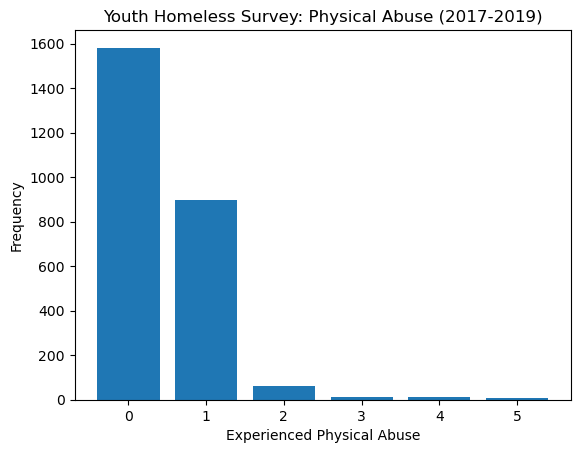

In [51]:
# Physical Abuse chart

# Extracting the value counts of 'nh_pi'
dv_physical_counts = youth['dv_physical'].value_counts()

# Plotting the bar chart
plt.bar(dv_physical_counts.index.astype(str), dv_physical_counts.values)

# Adding title and labels
plt.title("Youth Homeless Survey: Physical Abuse (2017-2019)")
plt.xlabel("Experienced Physical Abuse")
plt.ylabel("Frequency")

# save figure
plt.savefig("dv_physical", dpi = 300)

# Show plot
plt.show();

# Bar Interpretation of Physical Abuse
____

From observing the youth homelessness survey results from 2017 to 2019, 1582 respondents replied not experiencing physical abuse while 899 respondents replied in experiencing physical abuse.

However, 63 respondents refused (represented as 2) to reply to this specific question while 14 have replied as "Don't Know (represented as 3). Out of safety concern, there were 12 respondents who did not respond to this question while 5 respondents simply left the question blank.  


* R - 2 - refused
* D - 3 - don't know
* C - 4 - safety concern or not collected
* N - 5 - Null

In [49]:
# Define a mapping dictionary for encoding
encoding_map = {'R': 2, 'D': 3, 'C': 4, 'N': 5}

# Replace values in the 'dv_physical' column with their encoded counterparts
youth['dv_physical'] = youth['dv_physical'].replace(encoding_map)

# Now, you can use the same method as before to sum the counts for each category
dv_physical_counts = youth['dv_physical'].value_counts()

# Show the resulting counts
print(dv_physical_counts)

dv_physical
0.0    1582
1.0     899
Name: count, dtype: int64


In [16]:
youth['sexorient'].value_counts()

sexorient
1    1369
0     694
3     190
2     146
M      72
4      50
R      28
5      20
D       4
Name: count, dtype: int64

In [17]:
# Define a mapping dictionary for encoding
encoding_map = {'M': 6, 'R': 7, 'D': 8}

# Replace values in the 'sexorient' column with their encoded counterparts
youth['sexorient'] = youth['sexorient'].replace(encoding_map)

# Now, you can use the same method as before to sum the counts for each category
sexorient_counts = youth['sexorient'].value_counts()

# Show the resulting counts
print(sexorient_counts)

sexorient
1    1369
0     694
3     190
2     146
6      72
4      50
7      28
5      20
8       4
Name: count, dtype: int64


In [ ]:
# Assuming 'youth' is your DataFrame
# Preprocess 'dv_sexual_rel' column to ensure consistency
youth['sexorient'] = pd.to_numeric(youth['dv_sexual_rel'], errors='coerce')

# Encode non-numeric values using get_dummies
encoded_dv_sexual_rel = pd.get_dummies(youth['dv_sexual_rel'], prefix='dv_sexual_rel')

# Concatenate the encoded columns with the original DataFrame
youth_encoded = pd.concat([youth, encoded_dv_sexual_rel], axis=1)

# Now, you can sum the counts for '0's, '1's, and the encoded values
dv_sexual_rel_counts = youth_encoded.filter(like='dv_sexual_rel').sum()

# Show the resulting counts
print(dv_sexual_rel_counts)

In [43]:
# M - null
youth['drugabuse'].value_counts()

drugabuse
0    1890
1     478
M     209
Name: count, dtype: int64

In [50]:
# Define a mapping dictionary for encoding
encoding_map = {'M': 2}

# Replace values in the 'drugabuse' column with their encoded counterparts
youth['drugabuse'] = youth['drugabuse'].replace(encoding_map)

# Now, you can use the same method as before to sum the counts for each category
drugabuse_counts = youth['drugabuse'].value_counts()

# Show the resulting counts
print(drugabuse_counts)

drugabuse
0    1890
1     478
2     209
Name: count, dtype: int64


In [62]:
youth['dv_sexual_rel'].value_counts()

dv_sexual_rel
0    1242
0     846
1     241
1     127
R      63
S      25
D      14
C      12
N       7
Name: count, dtype: int64

In [63]:
youth['dv_sexual_rel'].dtypes

dtype('O')

In [70]:
# R - 2 - refused
# D - 3 - don't know
# C - 4 - out of safety
# N - 5 - Null
# S - 6 - Skipped

# 'dv_sexual_rel'

# Define a mapping dictionary for encoding
encoding_map = {'R': 2, 'D': 3, 'C': 4, 'N': 5, 'S': 6}

# Replace values in the 'dv_sexual_rel' column with their encoded counterparts
youth['dv_sexual_rel'] = youth['dv_sexual_rel'].replace(encoding_map)

# Convert the 'dv_sexual_rel' column to int64 data type
youth['dv_sexual_rel'] = youth['dv_sexual_rel'].astype('int64')

# Now, you can use the same method as before to sum the counts for each category
dv_sexual_rel_counts = youth['dv_sexual_rel'].value_counts()

# Show the resulting counts
print(dv_sexual_rel_counts)

dv_sexual_rel
0    2088
1     368
2      63
6      25
3      14
4      12
5       7
Name: count, dtype: int64


In [71]:
youth['dv_sexual_rel'].value_counts()

dv_sexual_rel
0    2088
1     368
2      63
6      25
3      14
4      12
5       7
Name: count, dtype: int64

In [13]:
youth['subsabuse'].value_counts()

subsabuse
0    1888
1     359
M     192
Y      92
A      46
Name: count, dtype: int64

In [14]:
# Define a mapping dictionary for encoding
encoding_map = {'M': 2, 'Y': 3, 'A': 4}

# Replace values in the 'subsabuse' column with their encoded counterparts
youth['subsabuse'] = youth['subsabuse'].replace(encoding_map)

# Now, you can use the same method as before to sum the counts for each category
subsabuse_counts = youth['subsabuse'].value_counts()

# Show the resulting counts
print(subsabuse_counts)

subsabuse
0    1888
1     359
2     192
3      92
4      46
Name: count, dtype: int64
